# Importing the datasets

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
nlp = spacy.load('en_core_web_sm')

# Set option max columns display
pd.set_option('max_colwidth', 550)
pd.set_option('max_info_rows', 500)

# Dataset Overview

In [19]:
# Import Yelp Dataset
data_yelp = pd.read_csv('yelp_labelled.txt', sep='\t',header=None)
columan_name = ['Review', 'Sentiment']
data_yelp.columns = columan_name
data_yelp.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1


In [20]:
print(f'Dataset Yelp Contains of {data_yelp.shape[0]} Rows')

Dataset Yelp Contains of 1000 Rows


In [23]:
# check missing values
data_yelp.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [24]:
# check duplicate data
data_yelp.duplicated().sum()

4

In [25]:
# drop duplicate
data_yelp.drop_duplicates(inplace=True)
data_yelp.duplicated().sum()

0

In [16]:
# Import Amazon Dataset
data_amazon = pd.read_csv('amazon_cells_labelled.txt',sep='\t',header=None)
data_amazon.columns = columan_name
data_amazon.head() # 0-Negative, 1-Positive for positive review

,Review,Sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1


In [21]:
print(f'Dataset Amazon Contains of {data_amazon.shape[0]} Rows')

Dataset Amazon Contains of 1000 Rows


In [26]:
# check missing values
data_amazon.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [28]:
# check dupplicate data
data_amazon.duplicated().sum()

10

In [29]:
data_amazon.drop_duplicates(inplace=True)
data_amazon.duplicated().sum()

0

In [18]:
# import Data IMDB
data_imdb = pd.read_csv('imdb_labelled.txt',sep='\t',header=None)
data_imdb.columns = columan_name
data_imdb.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1


In [22]:
print(f'Dataset IMDB Contains of {data_imdb.shape[0]} Rows')

Dataset IMDB Contains of 748 Rows


In [30]:
# check missing values 
data_imdb.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [31]:
# check duplicate
data_imdb.duplicated().sum()

3

In [32]:
# drop duplicate
data_imdb.drop_duplicates(inplace=True)
data_imdb.duplicated().sum()

0

In [33]:
# Append all the data in a single dataframe
data = data_yelp.append([data_amazon, data_imdb],ignore_index=True)
data.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1


In [34]:
print(f'Dataset Contains of {data.shape[0]} Rows')

Dataset Contains of 2731 Rows


In [36]:
data['Sentiment'].value_counts()

1    1376
0    1355
Name: Sentiment, dtype: int64

# Data Preprocessing

In [ ]:
# here we will remove stopwords, punctuations
# as well as we will apply lemmatization

## Create Cleaning Function

In [37]:
import string
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS) # list of stopwords
stopwords

['when',
 'namely',
 'unless',
 're',
 'since',
 'twenty',
 'any',
 'eleven',
 '’d',
 'more',
 'side',
 'enough',
 'well',
 'am',
 'that',
 'off',
 '’ll',
 'used',
 'upon',
 'anything',
 'during',
 'few',
 'within',
 'forty',
 'full',
 'can',
 'n‘t',
 'those',
 'among',
 'whereas',
 'cannot',
 'former',
 'seem',
 'has',
 'done',
 'towards',
 'move',
 'them',
 'your',
 'moreover',
 'she',
 'should',
 'anyway',
 'top',
 'yours',
 'himself',
 'about',
 'sometime',
 'across',
 'why',
 'become',
 'everyone',
 'keep',
 'someone',
 'next',
 'further',
 'thus',
 'much',
 'still',
 'is',
 'her',
 'afterwards',
 'be',
 'indeed',
 'almost',
 'front',
 'as',
 'were',
 'until',
 'thence',
 'without',
 'hers',
 'but',
 'under',
 'hundred',
 '’ve',
 'down',
 'and',
 'empty',
 'ever',
 'noone',
 '‘s',
 'such',
 'other',
 'one',
 'never',
 'itself',
 'to',
 'whatever',
 'formerly',
 'really',
 'hereby',
 'all',
 'quite',
 "'m",
 'by',
 'anyone',
 'say',
 'seems',
 'beside',
 'around',
 '‘d',
 'herself'

In [39]:
# creating a function for data cleaning

# creating a function for data cleaning

def text_data_cleaning(sentence):
    doc = nlp(sentence)

    tokens = [] # list of tokens
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)
        
        
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [40]:
# if root form of that word is not pronoun then it is going to convert that into lower form
# and if that word is a proper noun, then we are directly taking lower form, because there is no lemma for proper noun

text_data_cleaning("Hello all, It's a beautiful day outside there!")

['hello', 'beautiful', 'day', 'outside']

stopwords and punctuations removed

## Split Data

In [41]:
data.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1


In [42]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['Review'], 
                                                    data['Sentiment'], 
                                                    test_size = 0.2, 
                                                    random_state = 123)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2184,), (547,), (2184,), (547,))

# Modeling

In [43]:
# Import Libraries
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [44]:
# tokenizer=text_data_cleaning, tokenization will be done according to this function
lr = Pipeline([("tfidf", TfidfVectorizer(tokenizer=text_data_cleaning)) , ("classifier", LogisticRegression())])

# it will first do vectorization and then it will do classification
lr.fit(x_train, y_train)

# Predictions for the X test
y_pred_lr = lr.predict(x_test)

In [45]:
# tokenizer=text_data_cleaning, tokenization will be done according to this function
lr = Pipeline([("tfidf", TfidfVectorizer(tokenizer=text_data_cleaning)) , ("classifier", LogisticRegression())])
dt = Pipeline([("tfidf", TfidfVectorizer(tokenizer=text_data_cleaning)) , ("classifier", DecisionTreeClassifier())])
rf = Pipeline([("tfidf", TfidfVectorizer(tokenizer=text_data_cleaning)) , ("classifier", RandomForestClassifier())])
ab = Pipeline([("tfidf", TfidfVectorizer(tokenizer=text_data_cleaning)) , ("classifier", AdaBoostClassifier())])
gb = Pipeline([("tfidf", TfidfVectorizer(tokenizer=text_data_cleaning)) , ("classifier", GradientBoostingClassifier())])
xg = Pipeline([("tfidf", TfidfVectorizer(tokenizer=text_data_cleaning)) , ("classifier", XGBClassifier())])
sv = Pipeline([("tfidf", TfidfVectorizer(tokenizer=text_data_cleaning)) , ("classifier", LinearSVC())])

# Train the Model
# it will first do vectorization and then it will do classification
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
ab.fit(x_train, y_train)
gb.fit(x_train, y_train)
xg.fit(x_train, y_train)
sv.fit(x_train, y_train)

# Predictions for the X test
y_pred_lr = lr.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_ab = lr.predict(x_test)
y_pred_gb = gb.predict(x_test)
y_pred_xg = xg.predict(x_test)
y_pred_sv = sv.predict(x_test)

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:16:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [46]:
abcd = [['Logistic Regression', accuracy_score(y_test, y_pred_lr), precision_score(y_test, y_pred_lr),
          recall_score(y_test, y_pred_lr), f1_score(y_test, y_pred_lr)],
        ['Decision Tree', accuracy_score(y_test, y_pred_dt), precision_score(y_test, y_pred_dt),
          recall_score(y_test, y_pred_dt), f1_score(y_test, y_pred_dt)],
        ['Random Forest', accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf),
          recall_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf)],
        ['Ada Boost', accuracy_score(y_test, y_pred_ab), precision_score(y_test, y_pred_ab),
          recall_score(y_test, y_pred_ab), f1_score(y_test, y_pred_ab)],
        ['Gradient Boost', accuracy_score(y_test, y_pred_gb), precision_score(y_test, y_pred_gb),
          recall_score(y_test, y_pred_gb), f1_score(y_test, y_pred_gb)],
        ['XG Boost', accuracy_score(y_test, y_pred_xg), precision_score(y_test, y_pred_xg),
          recall_score(y_test, y_pred_xg), f1_score(y_test, y_pred_xg)],
        ['SVC', accuracy_score(y_test, y_pred_sv), precision_score(y_test, y_pred_sv),
          recall_score(y_test, y_pred_sv), f1_score(y_test, y_pred_sv)]]

df_score = pd.DataFrame(abcd,columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],dtype=float)
df_score

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.813528,0.797101,0.827068,0.811808
1,Decision Tree,0.764168,0.762452,0.748120,0.755218
2,Random Forest,0.789762,0.793774,0.766917,0.780115
3,Ada Boost,0.813528,0.797101,0.827068,0.811808
4,Gradient Boost,0.755027,0.847368,0.605263,0.706140
5,XG Boost,0.769653,0.794118,0.710526,0.750000
6,SVC,0.813528,0.790780,0.838346,0.813869


SVC, Logistic Regression, and Ada Boost have similar score, but we will choose SVC as our final model

In [47]:
# classification_report
print(classification_report(y_test, y_pred_sv))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       281
           1       0.79      0.84      0.81       266

    accuracy                           0.81       547
   macro avg       0.81      0.81      0.81       547
weighted avg       0.81      0.81      0.81       547



<AxesSubplot:>

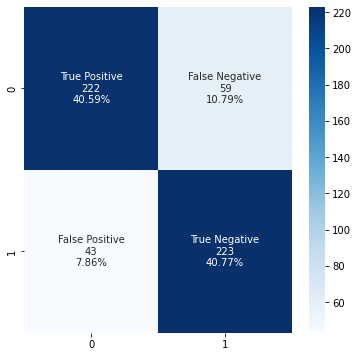

In [50]:
cf_matrix = confusion_matrix(y_test, y_pred_sv)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(6, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# Testing

In [56]:
test1 = ['That was fantastic food, I am so happy to be here!!!']
test2 = ['Soggy and too salty!']
test3 = ['Too expensive, not worth for the price']
test4 = ['Bad Services! We will not be going back to your restaurant!!']
test5 = ['I will be back many times soon, your food is really good and Prices were good']
test6 = ['Hot Ramen Level 5 is so good, it was really amazing']
         
test_group = [test1, test2, test3, test4, test5, test6]

In [57]:
for i in test_group:
    pred = sv.predict(i)
    if pred == 0:
        print('This text is Negative Sentiment :')
        print(i)
    else:
        print('This text is Positive Sentiment :')
        print(i)
        
    print('\n')

This text is Positive Sentiment :
['That was fantastic food, I am so happy to be here!!!']


This text is Negative Sentiment :
['Soggy and too salty!']


This text is Negative Sentiment :
['Too expensive, not worth for the price']


This text is Negative Sentiment :
['Bad Services! We will not be going back to your restaurant!!']


This text is Positive Sentiment :
['I will be back many times soon, your food is really good and Prices were good']


This text is Positive Sentiment :
['Hot Ramen Level 5 is so good, it was really amazing']


